# HDDM models informed with EEG and pre-trial accuracy

Imports

In [ ]:
# import cmdstanpy
# cmdstanpy.install_cmdstan()

In [1]:
from cmdstanpy import CmdStanModel
import os
import numpy as np
import pandas as pd
from datetime import datetime
import pickle
import json
import time
from contextlib import redirect_stdout
import seaborn as sns
# set path to CMD Stan
# set_cmdstan_path('/stan/math_HOW-TO-USE/cmdstan-ddm-7pm')
# cmdstan_path()

# set Stan globals
# os.environ['STAN_NUM_THREADS'] = "12"

/home/anna/Work/jointError_cmd_test/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Define the model

In [2]:
name = 'drift_boundary_pre_factor_tbb' 
model_name = f'wiener_{name}_model.stan'

print(f'Processing model: {model_name}')

Processing model: wiener_drift_boundary_pre_factor_tbb_model.stan


## Compile the model

In [5]:
stan_file = os.path.join('../models/TBB_models/', model_name)
hddm_model = CmdStanModel(
    stan_file=stan_file, 
    cpp_options={'STAN_THREADS': True}, 
    force_compile=True
)

12:41:52 - cmdstanpy - INFO - compiling stan file /home/anna/Work/jointError_cmd_test/models/TBB_models/wiener_drift_boundary_pre_factor_tbb_model.stan to exe file /home/anna/Work/jointError_cmd_test/models/TBB_models/wiener_drift_boundary_pre_factor_tbb_model
12:42:26 - cmdstanpy - INFO - compiled model executable: /home/anna/Work/jointError_cmd_test/models/TBB_models/wiener_drift_boundary_pre_factor_tbb_model


In [4]:
hddm_model.exe_info()

{'stan_version_major': '2',
 'stan_version_minor': '34',
 'stan_version_patch': '1',
 'STAN_THREADS': 'true',
 'STAN_MPI': 'false',
 'STAN_OPENCL': 'false',
 'STAN_NO_RANGE_CHECKS': 'false',
 'STAN_CPP_OPTIMS': 'false'}

## Define data file

In [15]:
data_file = os.path.join('../data/', 'sonata_data_standarized_preacc_f.json')

### Read the data

In [16]:
with open(data_file, 'r') as file:
    data = json.load(file)

In [17]:
data_df = pd.DataFrame(
    {
        'participant_index': data['participant'],
         'rt': abs(np.array(data['y']))
    }
)

In [18]:
data_df

,participant_index,rt
0,1,0.309485
1,1,0.386673
2,1,0.316943
3,1,0.278136
4,1,0.316809
...,...,...
50415,222,0.306004
50416,222,0.211662
50417,222,0.260115
50418,222,0.292400


In [19]:
with pd.option_context('display.max_rows', None,):
    display(data_df.groupby('participant_index').describe())

rt                                                    \
                   count      mean       std       min       25%       50%   
participant_index                                                            
1                  204.0  0.281334  0.070878  0.122435  0.229762  0.269474   
2                  270.0  0.292436  0.055121  0.204357  0.255184  0.275872   
3                  249.0  0.310325  0.066462  0.183300  0.259806  0.294731   
4                  162.0  0.215983  0.051350  0.132320  0.184399  0.208774   
5                  233.0  0.291637  0.069109  0.125450  0.250441  0.272390   
6                  208.0  0.247580  0.052449  0.146695  0.215111  0.230018   
7                  267.0  0.336173  0.075972  0.139194  0.285392  0.320373   
8                  166.0  0.258189  0.072548  0.125095  0.208771  0.250628   
9                  253.0  0.288705  0.054690  0.178393  0.254461  0.275597   
10                 234.0  0.310498  0.067273  0.177115  0.264612  0.292011   
11                 222.0  0.264161  0.056102  0.163584  0.231120  0.246889   
12                 201.0  0.265823  0.056315  0.123722  0.229699  0.250386   
13                 272.0  0.304697  0.063174  0.174075  0.263974  0.292265   
14                 223.0  0.308631  0.083034  0.146081  0.251321  0.306289   
15                 202.0  0.256259  0.037247  0.174033  0.229638  0.250174   
16                 260.0  0.312989  0.065535  0.165090  0.268517  0.299817   
17                 246.0  0.292822  0.059059  0.122016  0.251750  0.282302   
18                 156.0  0.226513  0.053357  0.121574  0.195069  0.215729   
19                 251.0  0.287541  0.057323  0.153534  0.249400  0.276538   
20                 242.0  0.318788  0.064171  0.207101  0.280924  0.299129   
21                 181.0  0.272665  0.073285  0.130481  0.222439  0.250383   
22                 256.0  0.346439  0.081978  0.213836  0.285429  0.327020   
23                 243.0  0.271718  0.051385  0.167106  0.235270  0.261138   
24                 278.0  0.288219  0.045907  0.180633  0.257262  0.277890   
25                 241.0  0.340222  0.081148  0.141466  0.292336  0.336298   
26                 245.0  0.272469  0.063307  0.146565  0.229657  0.257368   
27                 208.0  0.258221  0.052112  0.178643  0.222431  0.243407   
28                 217.0  0.284622  0.069460  0.146635  0.241277  0.262081   
29                 206.0  0.265522  0.067200  0.125452  0.229622  0.250693   
30                 204.0  0.258408  0.057972  0.136051  0.219356  0.246609   
31                 147.0  0.254419  0.058139  0.132518  0.218941  0.250113   
32                 199.0  0.234974  0.049034  0.160705  0.208855  0.222684   
33                 213.0  0.269352  0.081636  0.152874  0.220284  0.246297   
34                 158.0  0.270836  0.077688  0.125611  0.208971  0.256403   
35                 210.0  0.250812  0.047852  0.160141  0.222404  0.243274   
36                 250.0  0.305484  0.074640  0.160111  0.257106  0.285093   
37                 257.0  0.301531  0.064939  0.147023  0.257609  0.292217   
38                 264.0  0.304149  0.060075  0.223034  0.264133  0.285182   
39                 241.0  0.300068  0.072177  0.167192  0.250720  0.277896   
40                 280.0  0.287232  0.057460  0.173695  0.243988  0.271076   
41                 251.0  0.276491  0.066623  0.171974  0.232279  0.255290   
42                 257.0  0.328935  0.073493  0.201867  0.275512  0.306216   
43                 182.0  0.361168  0.081133  0.243416  0.299417  0.330622   
44                 256.0  0.316534  0.068357  0.130884  0.271144  0.305838   
45                 226.0  0.331018  0.106498  0.122604  0.261173  0.303330   
46                 225.0  0.265424  0.061065  0.146202  0.229694  0.250651   
47                 151.0  0.261753  0.062767  0.134651  0.229625  0.243745   
48                 246.0  0.298207  0.059481  0.153982  0.257437  0.285450   
49                 201.0  0.252414  0.052797

In [20]:
np.unique(data_df['participant_index'].to_numpy())

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

## Fit the model

Fit parameters

In [23]:
num_chains = 2
warmup = 50
num_samples = 50
thin=1
adapt_delta=0.8
random_state = 42

Define initial values

In [22]:
n_participants = data['n_participants']
n_acc = 2

min_rt = np.zeros(n_participants)
for idx, participant_idx in enumerate(np.unique(data['participant'])):
    participant_rts = data_df[data_df['participant_index'] == participant_idx]['rt'].to_numpy()
    min_rt[idx] = np.min(abs(participant_rts))

initials = []
for c in range(0, num_chains):
    chain_init = {               
        'ter_sd': np.random.uniform(.01, .2),
        'alpha_sd': np.random.uniform(.01, 1.),
        'alpha_cond_sd': np.random.uniform(.01, 1.), # <- was 0.5
        'delta_sd': np.random.uniform(.1, 3.),
        'delta_cond_sd': np.random.uniform(.1, 3.),
        
        'alpha_ne_sd': np.random.uniform(.01, .2), # <- works quite nice with .01, .2, works with .01, 1 
        'delta_ne_sd': np.random.uniform(.001, .2), # 0.2 ###########

        'alpha_pre_acc_sd': np.random.uniform(.01, .2), # <- works quite nice with .01, .2, works with .01, 1 
        'delta_pre_acc_sd': np.random.uniform(.001, .2), # 0.2 ###########

        'ter': np.random.uniform(0.05, .3),
        'alpha': np.random.uniform(1, 2), #0.2 ## <- does not work with < 1
        'alpha_cond': np.random.uniform(-.5, .5), # <- was -.1, .1 and works a little bit better
        'delta': np.random.uniform(-4., 4.),
        'delta_cond': np.random.uniform(-4., 4.),

        'alpha_ne': np.random.uniform(-.05, .05), # <- does not work with -0.1, 0.1
        'alpha_ne_cond': np.random.uniform(-.05, .05), # <- does not work with -0.1, 0.1

        'alpha_pre_acc': np.random.uniform(-0.1, .1, size=n_acc), 
        'alpha_pre_acc_cond': np.random.uniform(-0.1, .1, size=n_acc), 
        'alpha_ne_pre_acc_cond': np.random.uniform(-.05, .05, size=n_acc), # does not work with -0.1, 0.1

        'delta_ne': np.random.uniform(-.1, .1),
        'delta_ne_cond': np.random.uniform(-.1, .1),

        'delta_pre_acc': np.random.uniform(-.5, .5, size=n_acc),
        'delta_pre_acc_cond': np.random.uniform(-.5, .5, size=n_acc),
        'delta_ne_pre_acc_cond': np.random.uniform(-.1, .1, size=n_acc),
        
        'participants_ter': np.random.uniform(0.05, .3, size=n_participants),
        'participants_alpha': np.random.uniform(1, 2., size=n_participants), ## <- does not work with <1
        'participants_alpha_cond': np.random.uniform(-0.5, .5, size=n_participants), # <- was -.1, .1 and works a little bit better 
        'participants_delta': np.random.uniform(-4., 4., size=n_participants),
        'participants_delta_cond': np.random.uniform(-4., 4., size=n_participants),
        
        'participants_alpha_ne': np.random.uniform(-.05, .05, size=n_participants),
        'participants_delta_ne': np.random.uniform(-.1, .1, size=n_participants), #########

        'participants_alpha_ne_pre_acc': np.random.uniform(-.05, .05, size=(n_participants, n_acc)),
        'participants_delta_ne_pre_acc': np.random.uniform(-.1, .1, size=(n_participants, n_acc)),
    }
    for p in range(0, n_participants):
        chain_init['participants_ter'][p] = np.random.uniform(0., min_rt[p]/2)

    initials.append(chain_init)

print(min_rt)

[0.12243509 0.20435691 0.18330002 0.13231993 0.12545013 0.1466949
 0.13919401 0.12509513 0.17839289 0.17711496 0.16358399 0.12372184
 0.17407513 0.14608097 0.17403293 0.16509008 0.12201595 0.12157416
 0.15353394 0.20710111 0.130481   0.21383595 0.16710591 0.18063307
 0.14146614 0.14656496 0.17864299 0.14663506 0.12545204 0.13605094
 0.13251805 0.16070509 0.15287399 0.12561083 0.16014099 0.16011095
 0.14702296 0.22303391 0.16719198 0.17369509 0.17197418 0.20186687
 0.24341583 0.13088393 0.12260389 0.14620185 0.13465095 0.15398192
 0.17185807 0.15356398 0.14253807 0.12544513 0.13253903 0.14219713
 0.17383289 0.16015887 0.19233513 0.20849681 0.13212013 0.14586496
 0.12819886 0.13039112 0.16003299 0.14270902 0.16063094 0.1253829
 0.16695595 0.1741271  0.12204814 0.12655306 0.14615893 0.16003394
 0.1674509  0.13889003 0.17414093 0.15722203 0.15291214 0.12543511
 0.13272095 0.17764187 0.12571502 0.16348195 0.13233614 0.12212801
 0.1228559  0.17413497 0.1532011  0.16710615 0.17394614 0.183014

Perform fit

In [24]:
# with open('jupyter_logs.txt', 'a') as f:
#     with redirect_stdout(f):
start = time.time()
fit = hddm_model.sample(
    data=data_file,
    chains=num_chains, 
    seed=random_state,
    thin=thin,
    adapt_delta=adapt_delta,
    inits=initials, 
    iter_warmup=warmup, 
    iter_sampling=num_samples,
    parallel_chains=num_chains,
    threads_per_chain= 6,
    show_progress=True,
    show_console=True,
)
end = time.time()

print(f'Fitting took: {end - start}')

12:58:21 - cmdstanpy - INFO - CmdStan start processing


method = sample (Default)
sample
num_samples = 50
num_warmup = 50
save_warmup = 0 (Default)
thin = 1 (Default)
adapt
engaged = 1 (Default)
gamma = 0.05 (Default)
delta = 0.8 (Default)
kappa = 0.75 (Default)
t0 = 10 (Default)
init_buffer = 75 (Default)
term_buffer = 50 (Default)
window = 25 (Default)
save_metric = 0 (Default)
algorithm = hmc (Default)
hmc
engine = nuts (Default)
nuts
max_depth = 10 (Default)
metric = diag_e (Default)
metric_file =  (Default)
stepsize = 1 (Default)
stepsize_jitter = 0 (Default)
num_chains = 2
id = 1 (Default)
data
file = ../data/sonata_data_standarized_preacc_f.json
init = /tmp/tmpim0c8uko/sj3o4rt8.json
random
seed = 42
output
file = /tmp/tmpim0c8uko/wiener_drift_boundary_pre_factor_tbb_modelawludrq5/wiener_drift_boundary_pre_factor_tbb_model-20240604125821.csv
diagnostic_file =  (Default)
refresh = 100 (Default)
sig_figs = -1 (Default)
profile_file = profile.csv (Default)
save_cmdstan_config = 0 (Default)
num_threads = 12 (Default)


Gradient evaluation

13:00:44 - cmdstanpy - INFO - CmdStan done processing
13:00:44 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'wiener_drift_boundary_pre_factor_tbb_model.stan', line 154, column 4 to column 34)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'wiener_drift_boundary_pre_factor_tbb_model.stan', line 150, column 4 to column 25)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'wiener_drift_boundary_pre_factor_tbb_model.stan', line 154, column 4 to column 34)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'wiener_drift_boundary_pre_factor_tbb_model.stan', line 150, column 4 to column 25)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'wiener_drift_boundary_pre_factor_tbb_model.stan', line 154, column 4 to column 34)
	Exception: gamma_lpdf: Random variable is 0, but must b

Chain [1] Iteration: 100 / 100 [100%]  (Sampling)

Elapsed Time: 132.339 seconds (Warm-up)
9.99 seconds (Sampling)
142.329 seconds (Total)




13:00:45 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 50 divergent transitions (100.0%)
	Chain 2 had 50 divergent transitions (100.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


Fitting took: 143.32478284835815


In [ ]:
print(fit.diagnose())

In [38]:
summary_df = fit.summary()

In [39]:
summary_df.to_csv(f'test_stahl_summary.csv')

In [ ]:
# 7 - changed initials (as boundary(and main effects - the same as boundary, no sd priors || 1.23
# 6 - changed initials and main effects, and sd priors ||1.6 for delta_ne_sd
# 5 - changed initials and main effects, no sd priors || 1.10 for delta_ne_sd
# 4 - changed initials and main effects, and sd priors
# 3 - ?
# 2 - main effects, and sd priors
# 1 - changed main effects

<Axes: xlabel='iter__', ylabel='delta'>

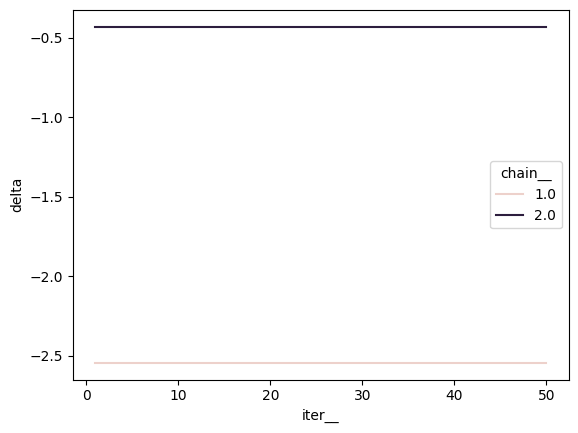

In [27]:
fit_df = fit.draws_pd()

sns.lineplot(
    data=fit_df,
    x = 'iter__',
    y = 'delta',
    hue='chain__'
)

In [30]:
fit_df.columns.to_list()

['chain__',
 'iter__',
 'draw__',
 'lp__',
 'accept_stat__',
 'stepsize__',
 'treedepth__',
 'n_leapfrog__',
 'divergent__',
 'energy__',
 'participants_ter[1]',
 'participants_ter[2]',
 'participants_ter[3]',
 'participants_ter[4]',
 'participants_ter[5]',
 'participants_ter[6]',
 'participants_ter[7]',
 'participants_ter[8]',
 'participants_ter[9]',
 'participants_ter[10]',
 'participants_ter[11]',
 'participants_ter[12]',
 'participants_ter[13]',
 'participants_ter[14]',
 'participants_ter[15]',
 'participants_ter[16]',
 'participants_ter[17]',
 'participants_ter[18]',
 'participants_ter[19]',
 'participants_ter[20]',
 'participants_ter[21]',
 'participants_ter[22]',
 'participants_ter[23]',
 'participants_ter[24]',
 'participants_ter[25]',
 'participants_ter[26]',
 'participants_ter[27]',
 'participants_ter[28]',
 'participants_ter[29]',
 'participants_ter[30]',
 'participants_ter[31]',
 'participants_ter[32]',
 'participants_ter[33]',
 'participants_ter[34]',
 'participants_ter[35

Save the MCMC fit object

In [87]:
fit.save_csvfiles(dir=f'../cmd_results/stahl/acc/stahl_acc_{name}_warmup-{warmup}_samples-{num_samples}_thin-{thin}/')